In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq

using StaticArrays

In [2]:

x1 = y1 = z1 = x2 = y2 = z3 = -15..15
box = x1 × y1 × z1 × x2 × y2 × z3

using CairoMakie

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end


HR (generic function with 1 method)

In [16]:
tspan = (0.0, 100000.0)

u0 = SA[0.02, 0.01, 0.01, 0.01, 0.01, 0.01]

a = 1.0
b = 3.0
c = 1.0
d = 5.0
xr = -1.6
r = 0.01
s = 5.0
I = 4.0
xv = 2.0

k1= 0.2
k2 = 0.2
k = 0.0

p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
  0.2
  0.2
  0.0

In [17]:
ds = ContinuousDynamicalSystem(HR, u0, p )

6-dimensional continuous dynamical system
 state:       [0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.2, 0.2, 0.0]

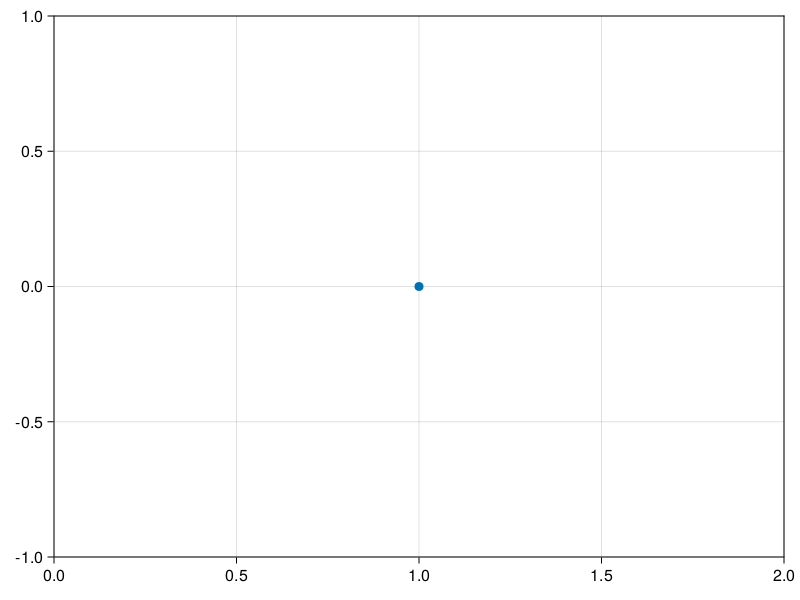

In [18]:
f = Figure()
ax = Axis(f[1, 1])
scatter!(ax, 1, 0.0)
f

In [19]:
fp, eigs, stable = fixedpoints(ds, box)

(6-dimensional Dataset{Float64} with 1 points, Vector{ComplexF64}[[-7.255608951954388 + 0.0im, -7.185471006716934 + 0.0im, 0.0373042367728979 + 0.0im, 0.04449374747416683 + 0.0im, 0.11536711527020828 + 0.0im, 0.1358326424566112 + 0.0im]], Bool[0])

In [20]:
sort(eigs[1], lt = (x,y) -> imag(x)==imag(y) ? real(x)<real(y)  : real(x)<real(y))

6-element Vector{ComplexF64}:
  -7.255608951954388 + 0.0im
  -7.185471006716934 + 0.0im
  0.0373042367728979 + 0.0im
 0.04449374747416683 + 0.0im
 0.11536711527020828 + 0.0im
  0.1358326424566112 + 0.0im

In [21]:
eigs[1]

6-element Vector{ComplexF64}:
  -7.255608951954388 + 0.0im
  -7.185471006716934 + 0.0im
  0.0373042367728979 + 0.0im
 0.04449374747416683 + 0.0im
 0.11536711527020828 + 0.0im
  0.1358326424566112 + 0.0im

In [22]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.736136  -1.70948  4.31932  -0.736136  -1.70948  4.31932

In [23]:
COLORS = [
    "black",
     "red",
    "orange",
    "yellow",
    "lime",
    "green"
]

6-element Vector{String}:
 "black"
 "red"
 "orange"
 "yellow"
 "lime"
 "green"

In [24]:
kvalues = range(0.2, 0.5, step = 0.01)

0.2:0.01:0.5

In [25]:
length(kvalues)

31

In [32]:
kvalues[2]

0.21

In [26]:
f = Figure()
ax = Axis(f[1,1]; xlabel = L"Re", ylabel = L"Im")

xlims!(-1.3, 1.3)
vlines!(ax, 0.0, lw = 0.5, linestyle = :dash)

for (index, k2) in enumerate(kvalues)
    
    println("index: $index");flush(stdout)
    println("k: $k");flush(stdout)
    
    p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
    ds = ContinuousDynamicalSystem(HR, u0, p )
    
    fp, eigs, stable = fixedpoints(ds, box)
    eigins = eigs[1]
    
    println("fixed  points: ", fp[1]); flush(stdout)
    println("eigins: $eigins"); flush(stdout)
    println("")
    for index in range(1, 5, step = 2)
    
        f_p = eigins[index]
        s_p = eigins[index+1]
       
        re1 = f_p.re
        im1 = f_p.im
        re2 = s_p.re
        im2 = s_p.im
        println("Re first pair pair: $re1")
        println("Re second pair pair: $re2")
        println(" ")
        println("Im first pair: $im1")
        println("Im second pair: $im2")
        println("----------------")
        println("----------------")
        
        if im1 != 0
            scatter!(ax, re1, im1, color = "black", markersize = 4.0)
        else
            scatter!(ax, re1, im1, color = COLORS[index], markersize = 4.0)
        end
        
        if im2 != 0
            scatter!(ax, re2, im2, color = "black", markersize = 4.0)
        else
            scatter!(ax, re2, im2, color = COLORS[index], markersize = 4.0)
        end
        
        
    end
    println(">>>>>>>>>>>>>>>>>"); flush(stdout)
    println("")
    
end

index: 1
k: 0.0
fixed  points: [-0.7361360361603697, -1.7094813186695057, 4.319319819198152, -0.7361360361603697, -1.7094813186695057, 4.319319819198152]
eigins: ComplexF64[-7.255608951954388 + 0.0im, -7.185471006716934 + 0.0im, 0.0373042367728979 + 0.0im, 0.04449374747416683 + 0.0im, 0.11536711527020828 + 0.0im, 0.1358326424566112 + 0.0im]

Re first pair pair: -7.255608951954388
Re second pair pair: -7.185471006716934
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.0373042367728979
Re second pair pair: 0.04449374747416683
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.11536711527020828
Re second pair pair: 0.1358326424566112
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>

index: 2
k: 0.0
fixed  points: [-0.7361353896423484, -1.7094765594194596, 4.319323051788259, -0.7360789653537174, -1.7090612161809957, 4.319605173231413]
eigins: ComplexF64[


index: 11
k: 0.0
fixed  points: [-0.7361295552679783, -1.7094336106951578, 4.3193522236601085, -0.7355653854718378, -1.7052821815216666, 4.322173072640812]
eigins: ComplexF64[-7.261104994381575 + 0.0im, -7.174825983316047 + 0.0im, 0.036672732262201496 + 0.0im, 0.045595659904064154 + 0.0im, 0.11279049286718293 + 0.0im, 0.13802385132236478 + 0.0im]

Re first pair pair: -7.261104994381575
Re second pair pair: -7.174825983316047
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.036672732262201496
Re second pair pair: 0.045595659904064154
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.11279049286718293
Re second pair pair: 0.13802385132236478
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>

index: 12
k: 0.0
fixed  points: [-0.7361289052550599, -1.7094288257600652, 4.319355473724701, -0.7355083274101755, -1.704862498448569, 4.322458362949123]
eigins: 


index: 21
k: 0.0
fixed  points: [-0.736123039345435, -1.7093856452758045, 4.3193848032728255, -0.7349948620933497, -1.7010872365181107, 4.325025689533252]
eigins: ComplexF64[-7.2655089006153855 + 0.0im, -7.1652762595117965 + 0.0im, 0.03615724629476701 + 0.0im, 0.04660338767071446 + 0.0im, 0.11053435686432027 + 0.0im, 0.1398728417562107 + 0.0im]

Re first pair pair: -7.2655089006153855
Re second pair pair: -7.1652762595117965
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.03615724629476701
Re second pair pair: 0.04660338767071446
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.11053435686432027
Re second pair pair: 0.1398728417562107
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>

index: 22
k: 0.0
fixed  points: [-0.7361223858195622, -1.7093808345234218, 4.31938807090219, -0.7349378167455248, -1.7006679724133935, 4.325310916272376]
eigins: Com


index: 31
k: 0.0
fixed  points: [-0.7361164882117457, -1.7093374210859658, 4.3194175589412716, -0.7344244657115716, -1.6968964791786372, 4.327877671442142]
eigins: ComplexF64[-7.269228194274347 + 0.0im, -7.156414309278547 + 0.0im, 0.035714664508717006 + 0.0im, 0.04756217532472082 + 0.0im, 0.10847030957468623 + 0.0im, 0.1415058842367571 + 0.0im]

Re first pair pair: -7.269228194274347
Re second pair pair: -7.156414309278547
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.035714664508717006
Re second pair pair: 0.04756217532472082
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.10847030957468623
Re second pair pair: 0.1415058842367571
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>



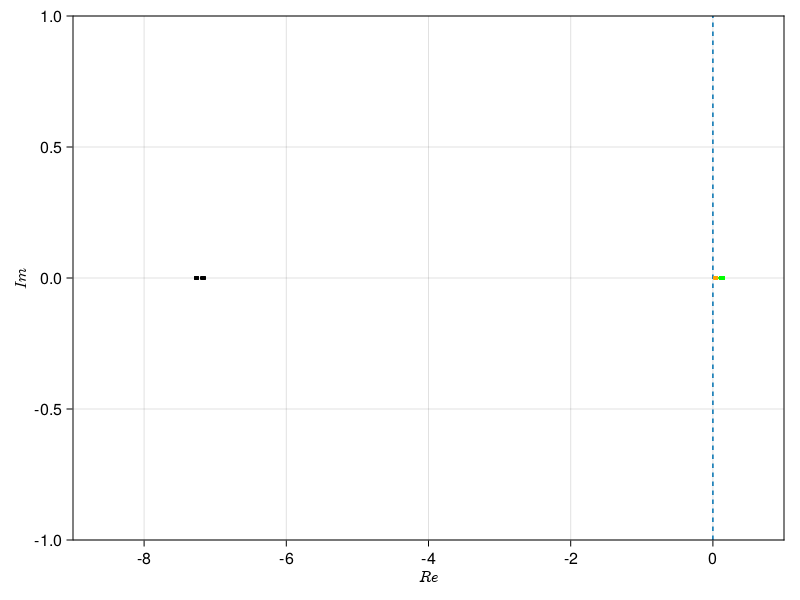

In [31]:
# from 0.20 to 0.0
xlims!(-9.00, 1.0)
f